## Import Files and Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
random.seed(0)
for dirname, _ , filenames in os.walk('/kaggle/input'):
    
    
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_targets_scored.csv


Getting File Location

In [2]:
print(filenames)

['train_features.csv', 'test_features.csv', 'train_targets_nonscored.csv', 'sample_submission.csv', 'train_targets_scored.csv']


## A) Reading train and test data

In [63]:
train_data = pd.read_csv(os.path.join('/kaggle/input/lish-moa', 'train_features.csv'))
#test_data = pd.read_csv(os.path.join('/kaggle/input/lish-moa' , 'test_features.csv')) #==> As Ouput for this is not given. we can not test our model over this data

train_target = pd.read_csv(os.path.join('/kaggle/input/lish-moa','train_targets_scored.csv'))


In [64]:
print('train_data shape is {}'.format(train_data.shape))
print("train_target shape is {}".format(train_target.shape))

train_data shape is (23814, 876)
train_target shape is (23814, 207)


From Above , it seems number of data is 2E4, which is avergage number.
The main things to note here is that:
 a) Number of features is 876, which is quite large. 
 b) Number of labels for single data prediction is 207, which is also above average.

## Split data into train and test set

In [65]:
from sklearn.model_selection import train_test_split

train_data, test_data , train_target, test_target  = train_test_split(train_data,train_target, test_size=0.2)

In [66]:
print("sample_train data\n")
train_data.head()

sample_train data



,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1986,id_15813cb98,ctl_vehicle,24,D1,-1.1870,-0.7247,-0.6826,0.1197,-0.0255,-0.4211,...,0.9614,0.5526,0.2918,0.8718,0.6408,1.3550,0.6898,0.3082,0.8665,0.1496
13844,id_95436d4c7,trt_cp,72,D2,0.3090,-0.7644,0.6069,-0.3760,-0.1232,-0.3417,...,-0.2439,0.5878,0.6602,-0.0552,-0.4073,-1.0660,0.0555,-0.4382,-2.1280,-1.7660
318,id_03741da7d,trt_cp,72,D1,0.6029,-0.9364,0.7720,1.2040,-1.1570,1.5960,...,-1.0820,0.2170,-0.0131,0.3983,0.0977,0.0287,0.1047,-0.1643,-0.2394,0.6507
18622,id_c7ffffdc2,trt_cp,24,D2,0.3038,0.1001,-0.1337,-1.0060,-0.1343,0.1561,...,-0.3641,0.1943,0.7456,1.0660,0.2725,-0.6635,0.3260,-1.5930,-0.2325,-0.4668
19071,id_ccbd2eb7d,trt_cp,72,D2,0.5566,-0.1088,-0.6553,1.1610,-0.3648,-0.1367,...,0.7361,0.2990,0.7153,-1.3830,1.0390,0.5334,0.9587,0.8315,1.5200,0.6850


# B) Data Exploration

## i) Getting Number of 'g' type and 'c' type feature count

In [67]:
NGTypeFeature = sum(train_data.columns.to_series().str.contains('g-') == True )
NCTypeFeature = sum(train_data.columns.to_series().str.contains('c-') == True )

print("NGTypeFeature = {} \nNCTypeFeature = {}".format(NGTypeFeature , NCTypeFeature))

NGTypeFeature = 772 
NCTypeFeature = 100


In [68]:
import seaborn as sns
def plotCounterPlot(feature):
    plt.figure(dpi=90)
    sns.countplot(train_data[feature])
    counts = train_data[feature].value_counts()
    for i in range(len(counts)):
        print(f"{b_}count of {counts.index[i]} is: {r_}{counts.values[i]}")

### ii) Counter Plot for feature Type

count of trt_cp is: 17563
count of ctl_vehicle is: 1488


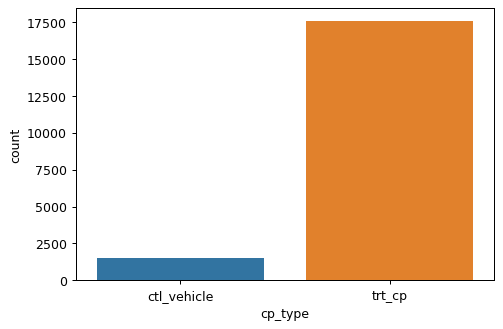

In [69]:
plotCounterPlot('cp_type')

### iii) Counter Plot for cp_time , cp_dose

count of 48 is: 6560
count of 72 is: 6253
count of 24 is: 6238
count of D1 is: 9710
count of D2 is: 9341


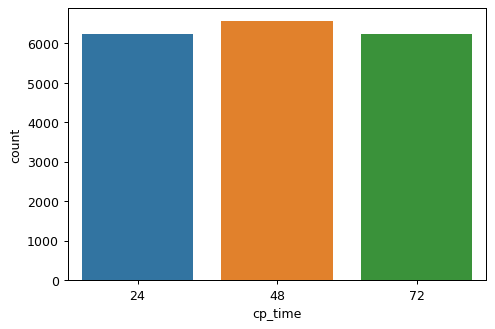

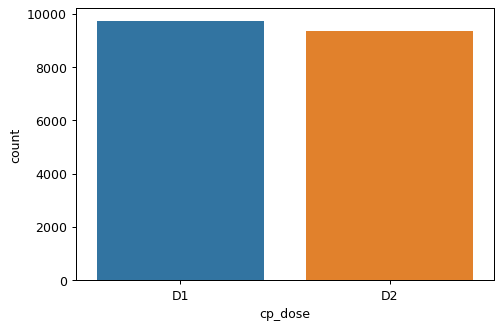

In [70]:
plotCounterPlot("cp_time")
plotCounterPlot('cp_dose')

## iv) Check Sample Data Values

In [71]:
#**Now will do data visulatization**
train_data.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,...,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000,19051.000000
mean,48.018897,0.248748,-0.091721,0.155527,0.080981,0.053049,-0.137548,0.037277,-0.201927,-0.183352,...,-0.464481,-0.455384,-0.512205,-0.500443,-0.503470,-0.348327,-0.466179,-0.375675,-0.463954,-0.298743
std,19.433998,1.385347,0.810268,1.039253,0.952961,1.022465,1.177170,0.880897,1.121777,1.732019,...,1.979202,2.025411,1.992008,2.091737,2.143181,1.609972,2.046362,1.686824,1.816672,1.394318
min,24.000000,-5.420000,-5.147000,-9.104000,-5.766000,-6.369000,-10.000000,-10.000000,-8.922000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473200,-0.561550,-0.438600,-0.430400,-0.469000,-0.596850,-0.488500,-0.523350,-0.507550,...,-0.569900,-0.569250,-0.592500,-0.574700,-0.567150,-0.569700,-0.565600,-0.559100,-0.588200,-0.565250
50%,48.000000,-0.004500,-0.041500,0.076800,0.009100,-0.025500,-0.012200,0.001200,-0.017400,0.010600,...,-0.013800,0.004600,-0.011300,-0.017900,-0.005300,-0.009500,-0.009300,-0.008100,0.015000,-0.022600
75%,72.000000,0.527900,0.406000,0.660600,0.462500,0.463100,0.512750,0.530400,0.410750,0.545000,...,0.455600,0.459400,0.442200,0.444500,0.467200,0.443750,0.458500,0.442700,0.461600,0.437200
max,72.000000,10.000000,5.039000,8.257000,10.000000,8.534000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [72]:
import matplotlib.pyplot as plt

print("Checkig is train_data is panda data or not: {}".format((type(train_data))))

Checkig is train_data is panda data or not: <class 'pandas.core.frame.DataFrame'>


In [73]:
train_data.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1986,id_15813cb98,ctl_vehicle,24,D1,-1.1870,-0.7247,-0.6826,0.1197,-0.0255,-0.4211,...,0.9614,0.5526,0.2918,0.8718,0.6408,1.3550,0.6898,0.3082,0.8665,0.1496
13844,id_95436d4c7,trt_cp,72,D2,0.3090,-0.7644,0.6069,-0.3760,-0.1232,-0.3417,...,-0.2439,0.5878,0.6602,-0.0552,-0.4073,-1.0660,0.0555,-0.4382,-2.1280,-1.7660
318,id_03741da7d,trt_cp,72,D1,0.6029,-0.9364,0.7720,1.2040,-1.1570,1.5960,...,-1.0820,0.2170,-0.0131,0.3983,0.0977,0.0287,0.1047,-0.1643,-0.2394,0.6507
18622,id_c7ffffdc2,trt_cp,24,D2,0.3038,0.1001,-0.1337,-1.0060,-0.1343,0.1561,...,-0.3641,0.1943,0.7456,1.0660,0.2725,-0.6635,0.3260,-1.5930,-0.2325,-0.4668
19071,id_ccbd2eb7d,trt_cp,72,D2,0.5566,-0.1088,-0.6553,1.1610,-0.3648,-0.1367,...,0.7361,0.2990,0.7153,-1.3830,1.0390,0.5334,0.9587,0.8315,1.5200,0.6850


In [74]:
NDataRow , NDataCol = train_data.shape
print("NumberOfSample on which testing is done= {}  \nNo of Feature which are recoreded= {}".format(NDataRow,NDataCol))

NumberOfSample on which testing is done= 19051  
No of Feature which are recoreded= 876


## v) Count of top 100 Feature

In [75]:
import plotly.express as px
df = train_target.iloc[:,1:].sum(axis=0).sort_values(ascending=True)[-50:]
fig = px.bar(x=df.values,y = df.index,color=df.values)
fig.show()

In [76]:
def plotDistribution(feature, color):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.distplot(train_data[feature],color=color)
    plt.subplot(122)
    sns.violinplot(train_data[feature])
    print("{}Max value of {} is: {} {:.2f} \n{}Min value of {} is: {} {:.2f}\n{}Mean of {} is: {}{:.2f}\n{}Standard Deviation of {} is:{}{:.2f}"\
      .format(y_,feature,r_,train_data[feature].max(),g_,feature,r_,train_data[feature].min(),b_,feature,r_,train_data[feature].mean(),m_,feature,r_,train_data[feature].std()))

In [77]:
#print(train_data['g-0'].describe())
#plt.plot(np.linspace(0,1,NDataRow),train_data['g-0'])
#plt.hist(train_data['g-0'])

Max value of g-0 is:  10.00 
Min value of g-0 is:  -5.42
Mean of g-0 is: 0.25
Standard Deviation of g-0 is:1.39
Max value of g-12 is:  10.00 
Min value of g-12 is:  -8.59
Mean of g-12 is: 0.14
Standard Deviation of g-12 is:1.23
Max value of g-20 is:  9.84 
Min value of g-20 is:  -10.00
Mean of g-20 is: -0.10
Standard Deviation of g-20 is:1.21
Max value of g-40 is:  4.20 
Min value of g-40 is:  -10.00
Mean of g-40 is: -0.19
Standard Deviation of g-40 is:1.26
Max value of g-60 is:  10.00 
Min value of g-60 is:  -10.00
Mean of g-60 is: -0.05
Standard Deviation of g-60 is:1.00
Max value of g-60 is:  10.00 
Min value of g-60 is:  -10.00
Mean of g-60 is: -0.05
Standard Deviation of g-60 is:1.00
Max value of g-90 is:  10.00 
Min value of g-90 is:  -4.92
Mean of g-90 is: 0.18
Standard Deviation of g-90 is:1.30
Max value of g-100 is:  10.00 
Min value of g-100 is:  -5.92
Mean of g-100 is: 0.55
Standard Deviation of g-100 is:2.15


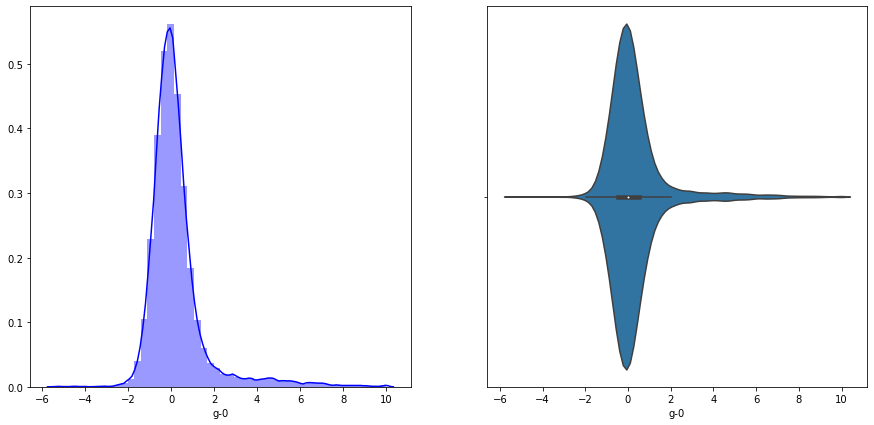

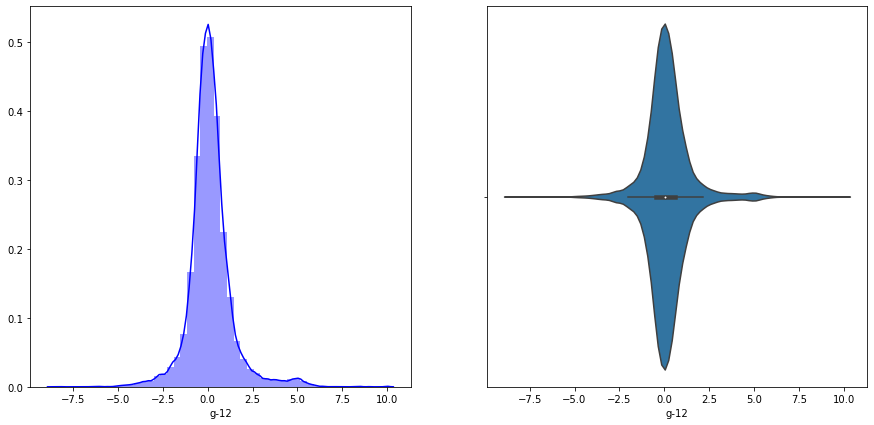

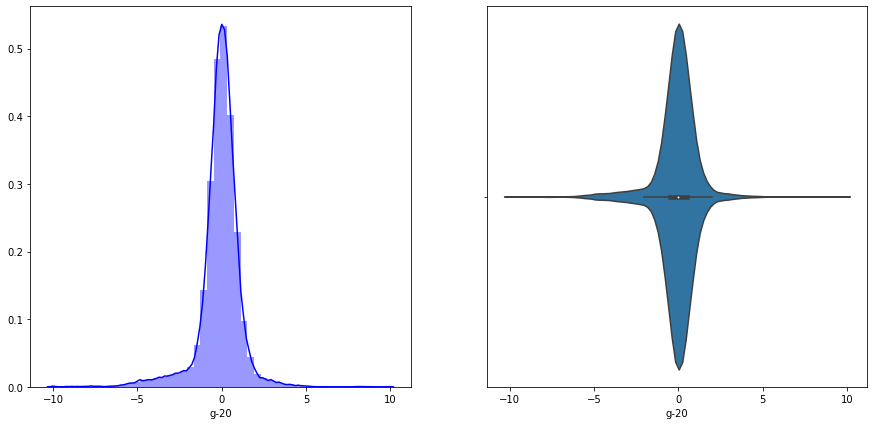

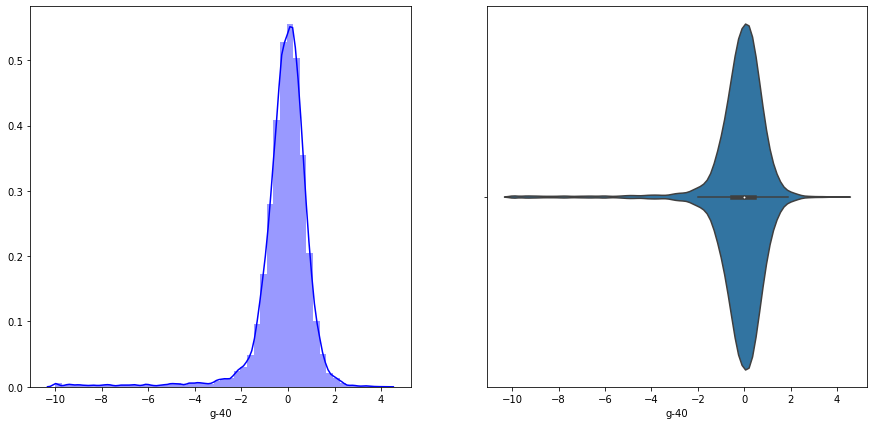

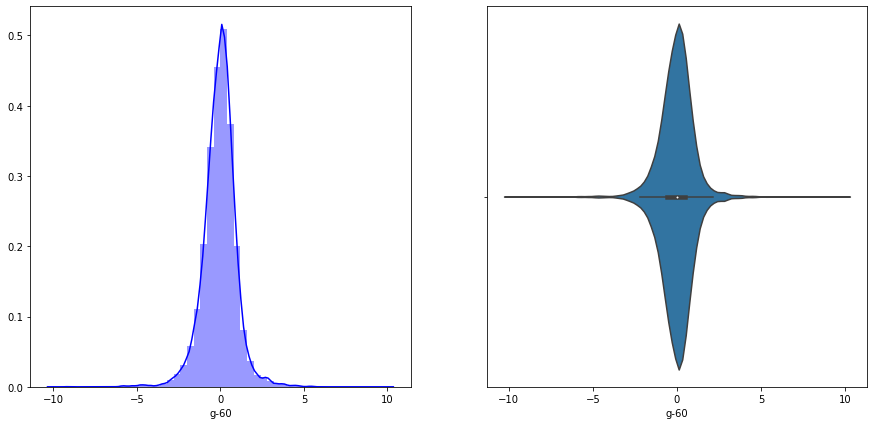

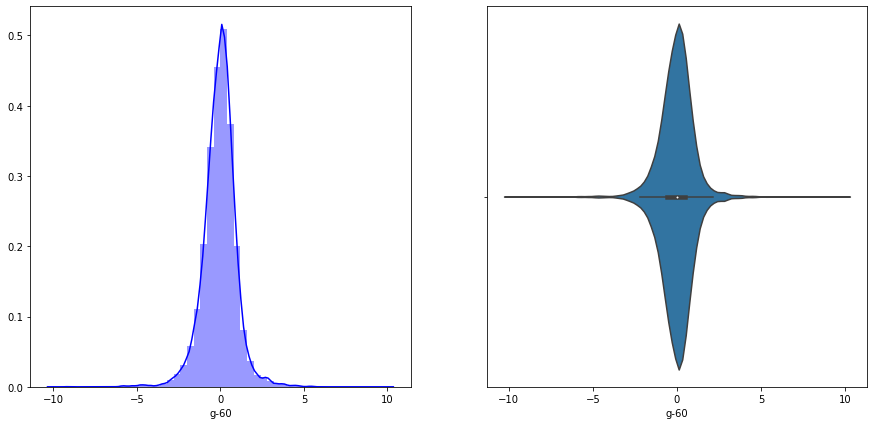

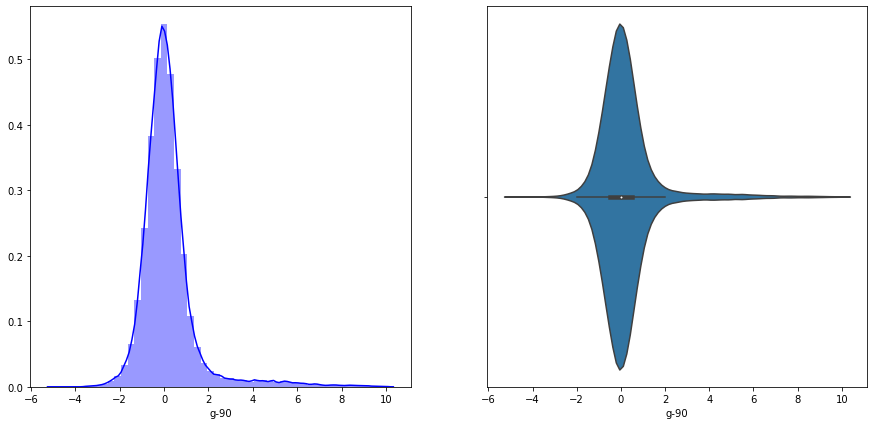

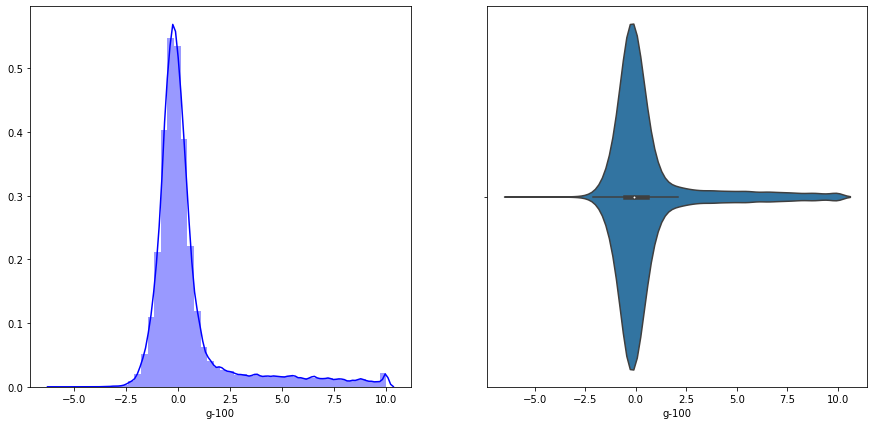

In [78]:
plotDistribution("g-0" , "blue")
plotDistribution("g-12" , "blue")
plotDistribution("g-20" , "blue")
plotDistribution("g-40" , "blue")
plotDistribution("g-60" , "blue")
plotDistribution("g-60" , "blue")
plotDistribution("g-90" , "blue")
plotDistribution("g-100" , "blue")


In [79]:
'''
arr = [15,5,7,8,13,89]
arr =[15,56]
fig , ax = plt.subplots(len(arr),sharex = 'col',sharey = 'row')

for idx,val in enumerate(arr):
    ax[idx].hist(train_data[train_data.columns[val]])
    ax[idx].set_title(val)
    print("idx = {} val = {}".format(idx,val))

#plt.xlim(-6,6)
plt.xticks(np.arange(-6,6,1))
plt.yticks(range(0,2000,250))

#axis([0 inf 0 inf])
plt.show()
'''

'\narr = [15,5,7,8,13,89]\narr =[15,56]\nfig , ax = plt.subplots(len(arr),sharex = \'col\',sharey = \'row\')\n\nfor idx,val in enumerate(arr):\n    ax[idx].hist(train_data[train_data.columns[val]])\n    ax[idx].set_title(val)\n    print("idx = {} val = {}".format(idx,val))\n\n#plt.xlim(-6,6)\nplt.xticks(np.arange(-6,6,1))\nplt.yticks(range(0,2000,250))\n\n#axis([0 inf 0 inf])\nplt.show()\n'

In [80]:
#plt.hist(train_data[train_data.columns[7]])


In [81]:
minValOfFeature = min(train_data.min(axis = 1))
maxValOfFeature = max (train_data.iloc[: , 4:].max(axis = 1))
print("min Feature data = {} , maxvalOfFeature = {}".format(minValOfFeature , maxValOfFeature))

min Feature data = -10.0 , maxvalOfFeature = 10.0


## From above diagram and stasticis it , can be observed that pretty all of the feature are in range -10 to +10.
Showing that input data is well structured.

# C)Benchmark Model Evaluation

### i) Getting Prediction Data

In [82]:
train_target.head()


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
1986,id_15813cb98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13844,id_95436d4c7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,id_03741da7d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18622,id_c7ffffdc2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19071,id_ccbd2eb7d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#train_target.describe()
data1 = train_target.apply(pd.DataFrame.describe, axis=1)

In [84]:
print(data1)
#plt.hist(train_target['acetylcholine_receptor_agonist'])

       count  unique  top  freq
1986     207       2    0   206
13844    207       3    0   203
318      207       3    0   204
18622    207       2    0   206
19071    207       3    0   205
...      ...     ...  ...   ...
4696     207       3    0   205
18339    207       3    0   205
3640     207       3    0   205
19653    207       3    0   205
15431    207       3    0   205

[19051 rows x 4 columns]


## ii) Get RandomForest Instance

In [85]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier 
  
#train_rf = train_data[1:,:]
 # create regressor object 
#clf = RandomForestClassifier(n_estimators = 100, random_state = 0,verbose = 5) 
clf = RandomForestClassifier(n_estimators = 40, max_depth = 20 , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 1) 
 
# fit the regressor with x and y data 
#regressor.fit(train_data, train_target)

## Copy Data

In [86]:
train_rf = train_data.copy()
train_data.head()

test_rf = test_data.copy()

## iii) Data Preprocessing

In [87]:
NSample = 876
NOutputSampel = 207

# A: #clf = RandomForestClassifier(n_estimators = 100, random_state = 0,verbose = 5) 
#(800,15) ==> Time to Train = 40.6min on CPU
#(800,1) ==> 1sec
#(800,5) ==> 4.7 min
#(800,10) ==> 17.8 min

#RandomForestClassifier(n_estimators = 100 , max_depth=15, random_state=0, verbose=5) + (800,5) ==> 1.8min

#clf = RandomForestClassifier(n_estimators = 40, max_depth = 20 , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20)  + (876 , 207) == 5min , train_accurray = 0.4586377760980936
#RandomForestClassifier(n_estimators = 50, max_depth = 40 , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20)  + (876,207) ==> train_time = 11.2min , train_accurray = 0.45909968925841943
#RandomForestClassifier(n_estimators = 50, max_depth = None , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20) (876,207) ==> train_time = 16.5min, train_accurray = 0.4588897287309986

#RandomForestClassifier(n_estimators = 50, max_depth = None , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 1) + (876 , 207) ==> train_time = 163.0 min, train_accurray = 0.9834131183337532 (this is clf.pre() accurracy)

print(train_data['cp_type'].unique())
train_rf['cp_dose'] = train_data['cp_dose'].replace({"D1":1 , "D2":2})
train_rf['cp_type'] = train_rf['cp_type'].replace({"trt_cp":1 , "ctl_vehicle":2})

test_rf['cp_dose'] = test_data['cp_dose'].replace({"D1":1 , "D2":2})
test_rf['cp_type'] = test_data['cp_type'].replace({"trt_cp":1 , "ctl_vehicle":2})

train_rf = train_rf.iloc[:,1:NSample]
test_rf = test_rf.iloc[:,1:NSample]
#iloc for array like slicing of panda dataframe

train_rf.head()

['ctl_vehicle' 'trt_cp']


,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1986,2,24,1,-1.1870,-0.7247,-0.6826,0.1197,-0.0255,-0.4211,0.5419,...,0.9614,0.5526,0.2918,0.8718,0.6408,1.3550,0.6898,0.3082,0.8665,0.1496
13844,1,72,2,0.3090,-0.7644,0.6069,-0.3760,-0.1232,-0.3417,0.9598,...,-0.2439,0.5878,0.6602,-0.0552,-0.4073,-1.0660,0.0555,-0.4382,-2.1280,-1.7660
318,1,72,1,0.6029,-0.9364,0.7720,1.2040,-1.1570,1.5960,-0.0766,...,-1.0820,0.2170,-0.0131,0.3983,0.0977,0.0287,0.1047,-0.1643,-0.2394,0.6507
18622,1,24,2,0.3038,0.1001,-0.1337,-1.0060,-0.1343,0.1561,-0.4412,...,-0.3641,0.1943,0.7456,1.0660,0.2725,-0.6635,0.3260,-1.5930,-0.2325,-0.4668
19071,1,72,2,0.5566,-0.1088,-0.6553,1.1610,-0.3648,-0.1367,-1.3540,...,0.7361,0.2990,0.7153,-1.3830,1.0390,0.5334,0.9587,0.8315,1.5200,0.6850


In [88]:
train_rf_array = train_rf.to_numpy()
test_rf_array = test_rf.to_numpy()
#train_target.head()
train_target_rf_arr = train_target.iloc[: , 1:NOutputSampel].to_numpy()

#print(train_rf_array[0])
#print(train_target_rf_arr[23])

print("train: {}".format(train_rf.shape))
print("target: {}".format(train_target_rf_arr.shape))

train: (19051, 875)
target: (19051, 206)


### Print Count for Each Output Category Type

In [89]:
print(sum(train_target_rf_arr))

[ 14  16  23 141 249  54  45  77  10 215 284  54   5  36  10   9  37  70
  59  33  29  65   3  36  10   6  11  16  61  27  14  35  41   5   1   9
  80  15  73   5  47  64  31 147  69  98   6  22  26  57  17  55  24   6
 229  32  48  28  29  15  10  81  14 270  43  20  39  34  42   5  32 359
  83  31  22   5  42 325  90 329 273   3   1 123  36  32  18  20  36 227
  15  13  22  87 133  46 210  11  60 299  13  54  57  88  49 201  17  27
  61 213  74  30  22  24  55  24  37  34  80 218   5   6  47  10  48   4
  21  56  58  22   5  70  15 102  40  28 652   5  21   9  18   7  13  45
  70  31  54  17  52 235  13 202  20 123  22  44  81  91  23  98  15  31
  68 569  34   5  80  16  47 186  11  56   6  25  23  20 189 330  37  30
  26  23 210  16  61   4  14  49  26  12  31  22   6  35 110  12   3  20
  37 247  58   6 141  20  33  25]


In [90]:
#https://stackoverflow.com/questions/22443041/predicting-how-long-an-scikit-learn-classification-will-take-to-run
clf.fit(train_rf_array, train_target_rf_arr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40building tree 4 of 40

building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min


building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


RandomForestClassifier(max_depth=20, n_estimators=40, n_jobs=-1, random_state=0,
                       verbose=5)

In [91]:
print("Traing Done")

Traing Done


In [93]:
print("train shap is {}, test shape is {}".format(train_rf_array.shape,test_rf_array.shape))

train shap is (19051, 875), test shape is (4763, 875)


## Get Prediction On test Data

In [94]:
#clf.score(test_rf_array, train_target_rf_arr)
#test_rf_array , 
#crt(test_rf_array,train_target_rf_arr)
predection = clf.predict(train_rf_array)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.7s finished


## Loss Function Defination

In [101]:
import torch.nn as nn
creteria = nn.BCEWithLogitsLoss()

## Accurray Calculation on Test Data

In [103]:
import torch
print("predection shap is {}, train_target_rf_arris {}".format(predection.shape,train_target_rf_arr.shape))
accurray_test = creteria( torch.from_numpy(predection.astype(np.float32)) , torch.from_numpy(train_target_rf_arr.astype(np.float32)))
print("accurray on test data is: {}".format(accurray_test))

predection shap is (19051, 206), train_target_rf_arris (19051, 206)
accurray on test data is: 0.6925875544548035
